****************Logistic Classification****************

              Head value:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0   40   M           ATA        140          289          0     Normal    172              N      0.0       Up             0
1   49   F           NAP        160          180          0     Normal    156              N      1.0     Flat             1
2   37   M           ATA        130          283          0         ST     98              N      0.0       Up             0
3   48   F           ASY        138          214          0     Normal    108              Y      1.5     Flat             1
4   54   M           NAP        150          195          0     Normal    122              N      0.0       Up             0

              Describe:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR     Oldpeak  HeartDisease
count  918.000000  918.000000   918.000000  918.0

Would you like to see the visuals (Yes/No):  yes


Displaying visuals...


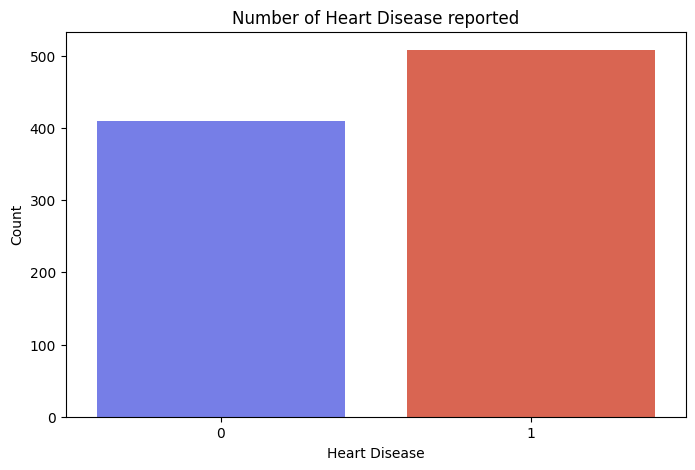

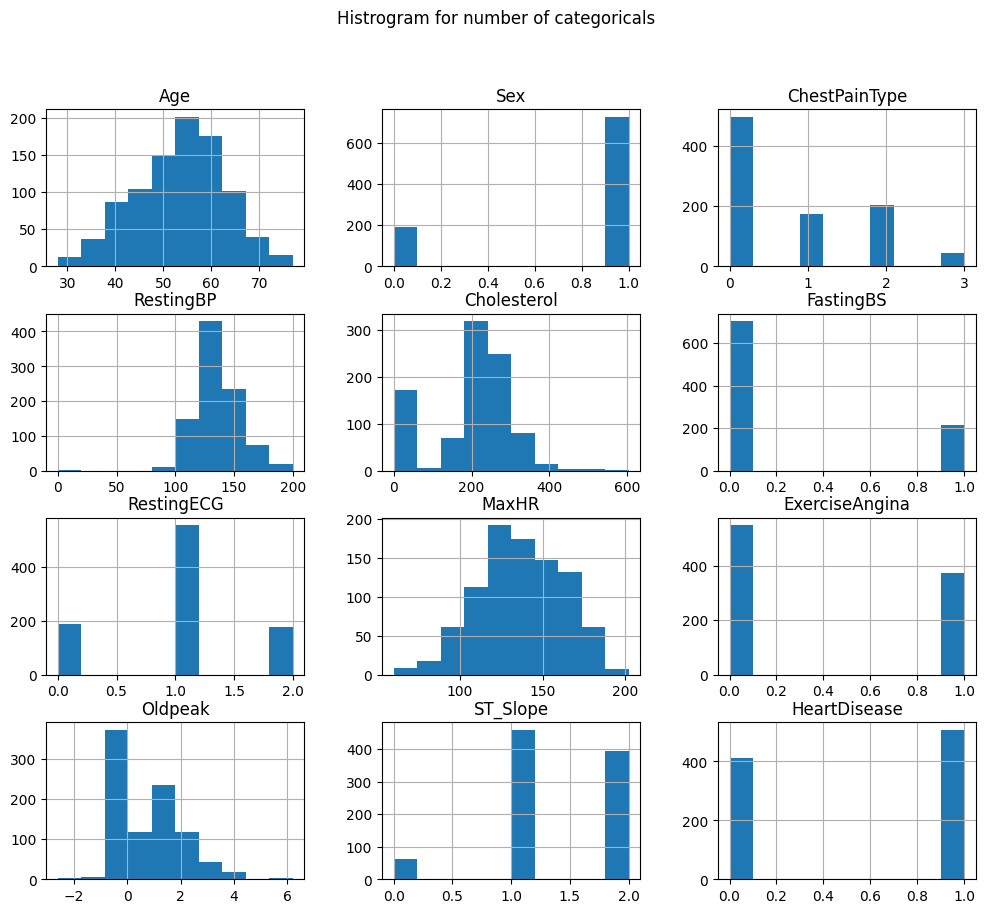

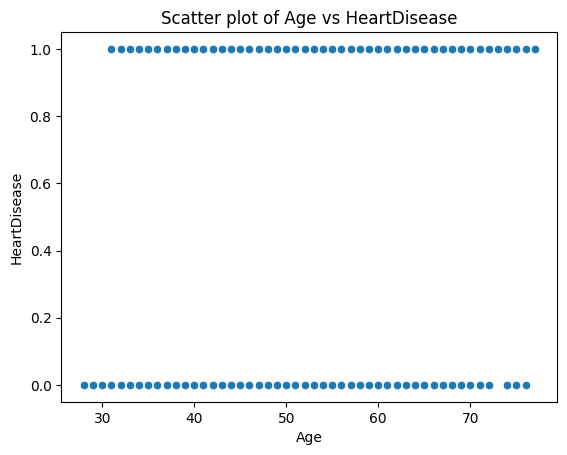

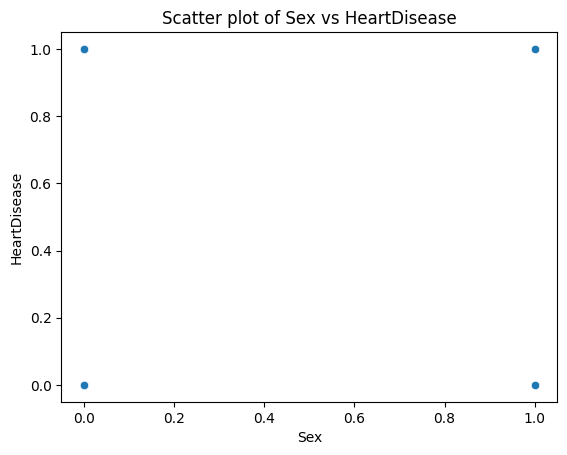

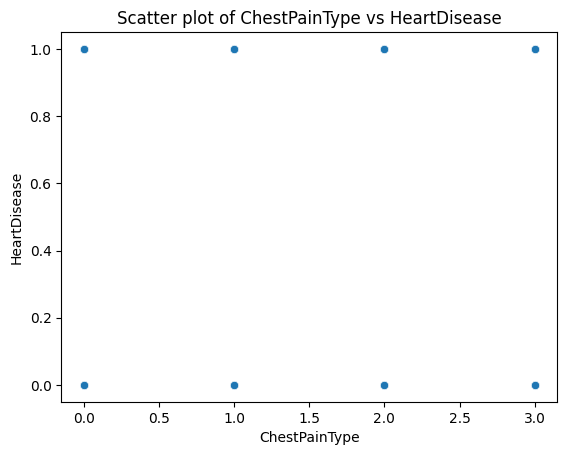

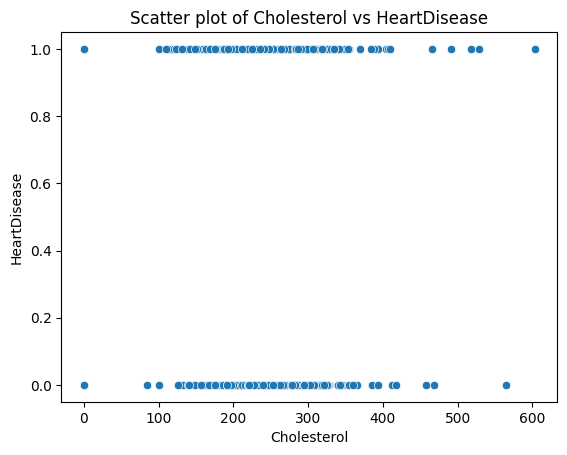

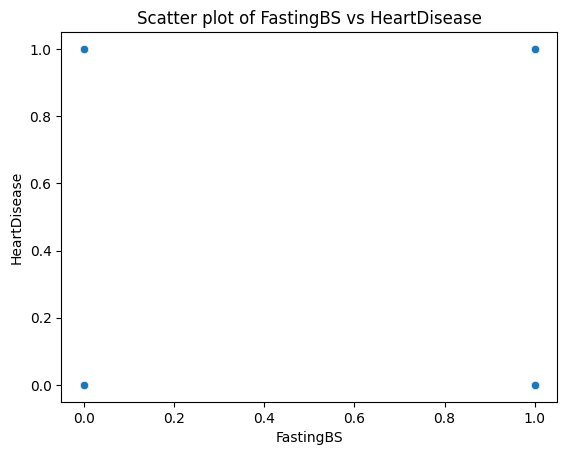

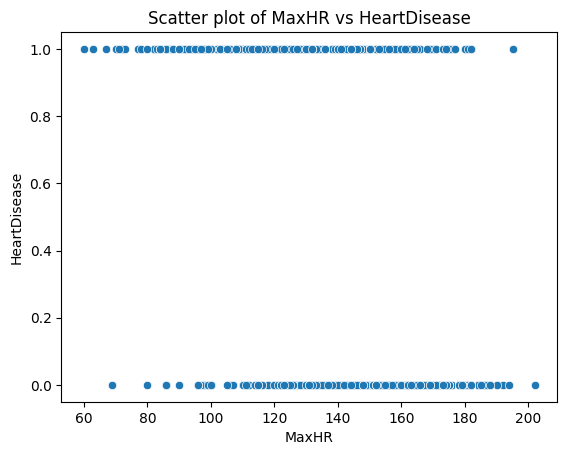

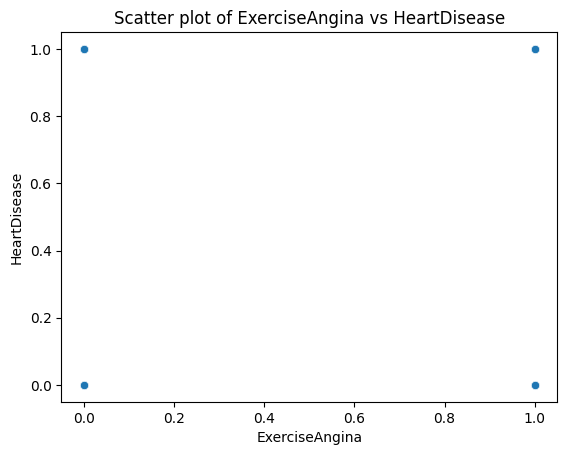

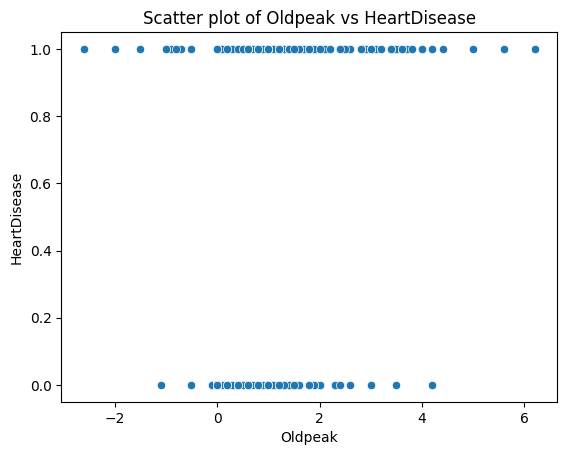

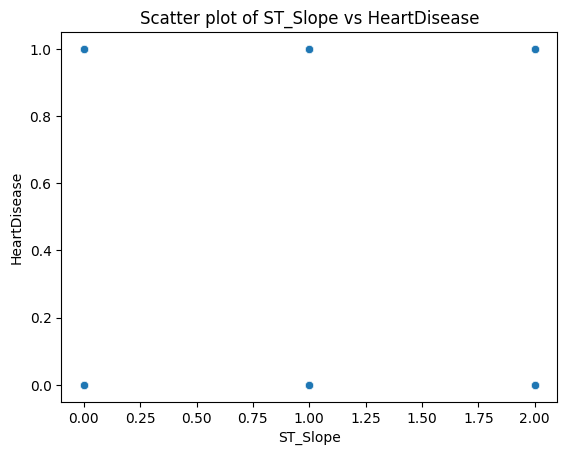

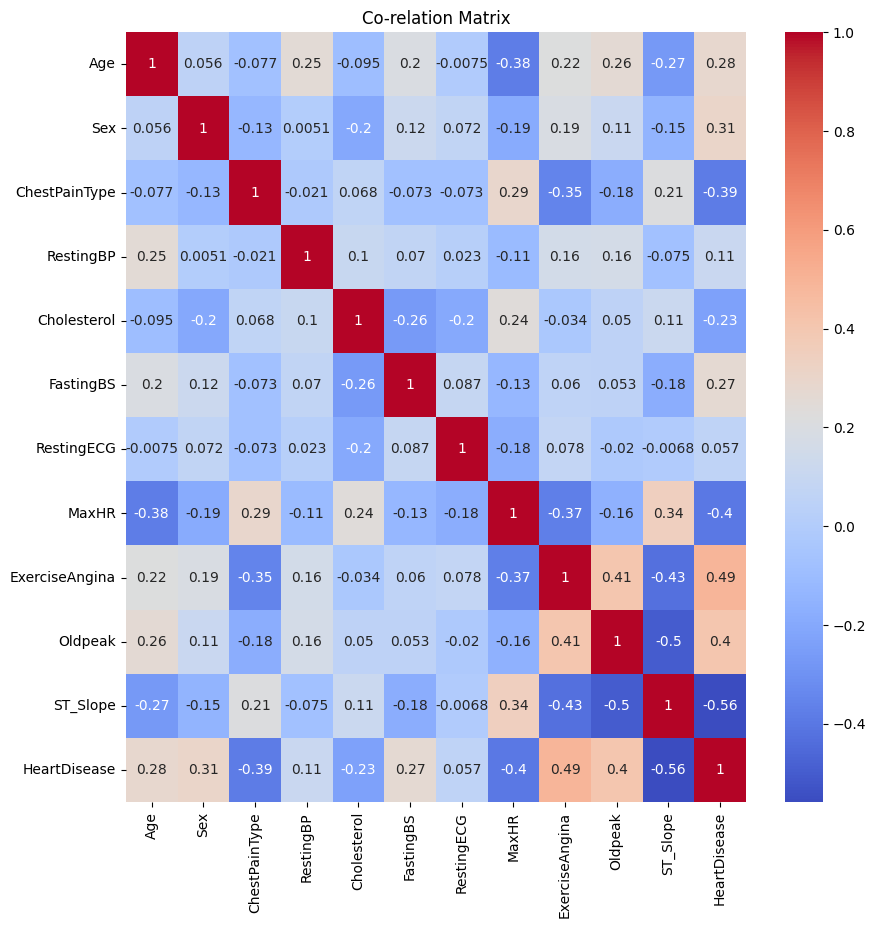


ROC-AUC Score: 0.9283893676417041


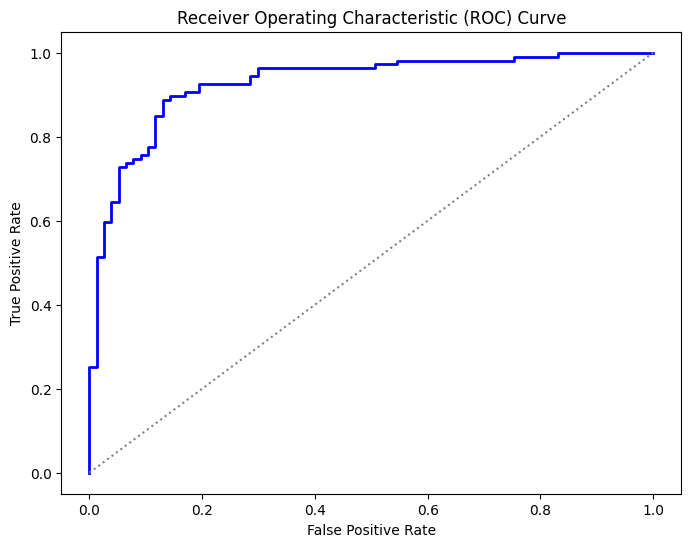

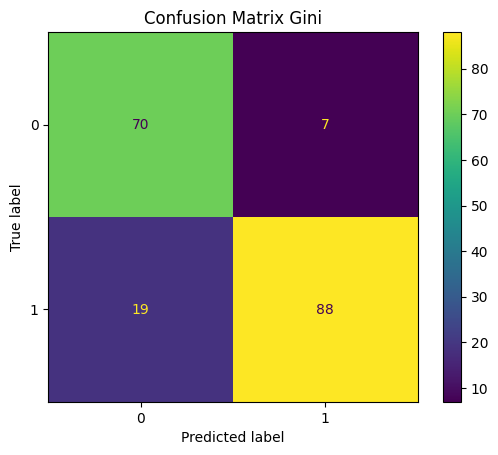

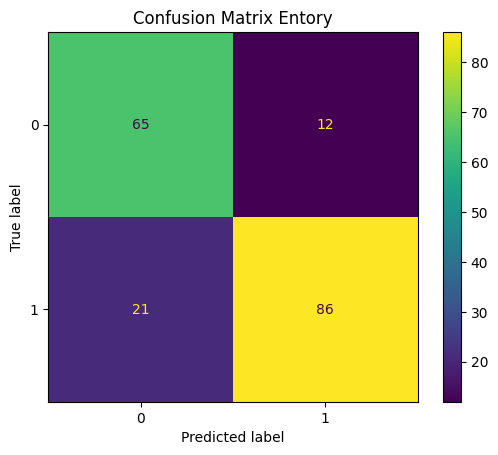

Have Heart Disease: 508
Do Not Have Heart Disease: 410
Thresholds [       inf 0.99143985 0.93989148 0.93969416 0.85623751 0.85401856
 0.82254572 0.81275268 0.78821512 0.78465545 0.73004352 0.72169018
 0.71920379 0.71751687 0.7160908  0.70761916 0.70200169 0.69426521
 0.66770623 0.65701056 0.52325591 0.48581829 0.36464359 0.34995237
 0.34877316 0.30185368 0.28572627 0.27809284 0.27060379 0.20765337
 0.16044849 0.15995287 0.15480588 0.07869976 0.07867097 0.07382261
 0.06944893 0.04755738 0.04738544 0.04036075 0.03965922 0.01252376]

************************User Interface************************


Age :  56
Sex (M/F) :  f
ChestPainType (ASY/ATA/NAP/TA) :  ATA
RestingBP :  561
Cholesterol :  213
FastingBS (0/1) :  0
RestingECG(NORMAL/ST/LVH) :  LVH
MaxHR :  551
ExerciseAngina (Y/N) :  N
Oldpeak :  96
ST_Slope (Down/Flat/Up) :  Up


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope
0   56   F           ATA        561          213          0        LVH    551              N     96.0       Up
Models Predictions 


                  According to Logistic Model: 
                  Heart Disease - Positive
                  And the predicated value = [1]
                  

                  According to Random Forest Classification - GINI: 
                  Heart Disease - Negative
                  And the predicated value = [0]
                  

                  According to Random Forest Classification - Entory: 
                  Heart Disease - Negative
                  And the predicated value = [0]
                  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)

class LogisticModel:
    def __init__(self):
        self.df = pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data-Science\Data Science\Projects\heart.csv')
        self.Target = self.df['HeartDisease']
        self.LE = LabelEncoder()
        self.LOG_Model = LogisticRegression()
        self.RFC_Gini_Model = RandomForestClassifier(n_estimators=5, criterion='gini', random_state=100)
        self.RFC_Entory_Model = RandomForestClassifier(n_estimators=5, criterion='entropy', random_state=100)
        
    def import_data(self):
    
        df_copy = self.df.copy()
        head_value = df_copy.head()
        describe = df_copy.describe()
        null_val = df_copy.isna().sum()
        print(f'''
              Head value:\n{head_value}\n
              Describe:\n{describe}\n
              Null Val:\n{null_val}\n
              ''')
        return df_copy

    def preprocessing(self, df_copy):

        cat_features = [col for col in df_copy.columns if df_copy[col].dtype == 'object']
        for col in cat_features:
            df_copy[col] = self.LE.fit_transform(df_copy[col])
        print(df_copy.head())
        return df_copy  # Return the preprocessed DataFrame

    def feature_selection(self, df_copy):
        print('\n Feature selection...')
        corr_matrix = df_copy.corr(method='pearson')
        thresh_hold = 0.2
        selected_features = corr_matrix.index[abs(corr_matrix['HeartDisease']) >= thresh_hold].to_list()
        selected_features.remove('HeartDisease')
                
        print(self.df[selected_features].head())
        return selected_features

    def create_pipeline(self, selected_features):

        print('\n Creating pipeline...')
        
        cat_features = [col for col in self.df[selected_features] if self.df[col].dtype == 'object']
        num_features = [col for col in self.df[selected_features] if self.df[col].dtype != 'object']
        
        print(f'''
            Categorical Features:
                {cat_features}\n
            Numerical Features: 
                {num_features}\n
        ''')

        num_transfer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

        cat_transfer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])

        col_transfer = ColumnTransformer(transformers=[
            ('num', num_transfer, num_features),
            ('cat', cat_transfer, cat_features)
            ],
            remainder='passthrough').set_output(transform='pandas')

        # print(col_transfer.fit_transform(self.df))
        
        x_train, x_test, y_train, y_test = train_test_split(self.df[selected_features], self.Target, test_size=0.2, random_state=42)

        print("Shape of selected_features:", self.df[selected_features].shape)
        print("Shape of Target:", self.Target.shape)
        print("Shapes after split:")
        print("x_train:", x_train.shape)
        print("x_test:", x_test.shape)
        print("y_train:", y_train.shape)
        print("y_test:", y_test.shape)

        return col_transfer, x_train, y_train, x_test, y_test

    def train_and_predict(self, x_train, y_train, x_test, col_transfer):
        print('\n Training and predicting using Logistic Regression...')
        LOG_pipeline = make_pipeline(col_transfer, self.LOG_Model)
        LOG_pipeline.fit(x_train, y_train)
        
        LOG_y_pred = LOG_pipeline.predict(x_test)
        LOG_y_prob = LOG_pipeline.predict_proba(x_test)[:, 1]
        
        return LOG_y_pred, LOG_y_prob, LOG_pipeline

    def evaluate_model(self, x_train, y_train, x_test, y_test, LOG_y_pred, LOG_pipeline):
        print('\n Evaluating model...')
        train_score = LOG_pipeline.score(x_train, y_train)
        test_score = LOG_pipeline.score(x_test, y_test)
        conf_matrix = confusion_matrix(y_test, LOG_y_pred)
        class_report = classification_report(y_test, LOG_y_pred)
        acc_score = accuracy_score(y_test, LOG_y_pred)

        print(f'''\n 
        Train Score: {(train_score * 100)} % \n
        Test Score: {(test_score * 100)} % \n
        Accuracy Score: {(acc_score * 100)} % \n
        Confusion Matrix:
        {conf_matrix} \n
        Classification Report:
        {class_report}  \n      
        ''')
        
class Random_Forest(LogisticModel):
    
    def train_using_gini(self, col_transfer, x_train, y_train, x_test):
        
        RFC_Gini_pipeline = make_pipeline(col_transfer, self.RFC_Gini_Model)
        RFC_Gini_pipeline.fit(x_train, y_train)
        RFC_y_pred_Gini = RFC_Gini_pipeline.predict(x_test)

        return RFC_y_pred_Gini, RFC_Gini_pipeline
    
    def metric_gini(self, RFC_y_pred_Gini, RFC_Gini_pipeline, x_train, y_train, y_test, x_test):
        
        RFC_train_score_gini = RFC_Gini_pipeline.score(x_train, y_train)
        RFC_test_score_gini = RFC_Gini_pipeline.score(x_test, y_test)
        RFC_accouracy_gini = accuracy_score(y_test, y_pred=RFC_y_pred_Gini)
        RFC_confusion_matrix_gini = confusion_matrix(y_test, RFC_y_pred_Gini)
        RFC_classification_report_gini = classification_report(y_test, RFC_y_pred_Gini)
        print(f'''\n Gini Metrics \n
        Train Score: {(RFC_train_score_gini * 100)} % \n
        Test Score: {(RFC_test_score_gini * 100)} % \n
        Accuracy Score: {(RFC_accouracy_gini * 100)} % \n
        Confusion Matrix:
        {RFC_confusion_matrix_gini} \n
        Classification Report:
        {RFC_classification_report_gini}        
        ''')
        
        return RFC_confusion_matrix_gini
        
    def train_using_entory(self, col_transfer, x_train, y_train, x_test):
        
        RFC_Entory_pipeline = make_pipeline(col_transfer, self.RFC_Entory_Model)
        RFC_Entory_pipeline.fit(x_train, y_train)
        RFC_y_pred_Entory = RFC_Entory_pipeline.predict(x_test)
        
        return RFC_y_pred_Entory, RFC_Entory_pipeline

    def metric_entory(self, RFC_y_pred_Entory, RFC_Entory_pipeline, x_train, y_train, y_test, x_test):
               
        RFC_train_score_entory = RFC_Entory_pipeline.score(x_train, y_train)
        RFC_test_score_entory = RFC_Entory_pipeline.score(x_test, y_test)
        RFC_accouracy_entory = accuracy_score(y_test, y_pred=RFC_y_pred_Entory)
        RFC_confusion_matrix_entory = confusion_matrix(y_test, RFC_y_pred_Entory)
        RFC_classification_report_entory = classification_report(y_test, RFC_y_pred_Entory)
        print(f''' Entory Metrics \n
        Train Score: {(RFC_train_score_entory * 100)} % \n
        Test Score: {(RFC_test_score_entory * 100)} % \n
        Accuracy Score: {(RFC_accouracy_entory * 100)} % \n
        Confusion Matrix:
        {RFC_confusion_matrix_entory} \n
        Classification Report:
        {RFC_classification_report_entory}        
        ''')
        
        return RFC_confusion_matrix_entory
    
    def Cross_validation(self, RFC_Entory_pipeline, RFC_Gini_pipeline, x_train, y_train):
        
        cross_validation_gini = cross_val_score(estimator=RFC_Gini_pipeline, X=x_train, y=y_train, cv=10)
        cross_validation_entropy = cross_val_score(estimator=RFC_Entory_pipeline, X=x_train, y=y_train, cv=10)
        
        print(f''' Cross-Validation:
              Gini:
              {cross_validation_gini}\n 
              Entory:
              {cross_validation_entropy}\n''') 

class visuals(Random_Forest):
    
    def visualize_data(self, df_copy, y_test, LOG_y_prob, RFC_confusion_matrix_gini, RFC_confusion_matrix_entory, selected_features):
        custom_palette = ['#636EFA', '#EF553B']
        
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df_copy, x='HeartDisease', palette=custom_palette)
        plt.title('Number of Heart Disease reported')
        plt.xlabel('Heart Disease')
        plt.ylabel('Count')
        plt.show()
        
        df_copy.hist(figsize=(12,10))
        plt.suptitle('Histrogram for number of categoricals')   
        plt.show()
        
        for col in selected_features:
            sns.scatterplot(x=df_copy[col], y=df_copy['HeartDisease'],legend=True)
            plt.title(f'Scatter plot of {col} vs HeartDisease')
            plt.xlabel(col)
            plt.ylabel('HeartDisease') 
            plt.show()
            
        corr_matrix = df_copy.corr(method='pearson')
        plt.figure(figsize=(10, 10))
        plt.title('Co-relation Matrix')
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.show()
        
        roc_auc = roc_auc_score(y_test, LOG_y_prob)
        print("\nROC-AUC Score:", roc_auc)

        ''' 
        fpr (False Positive Rate)
        tpr (True positive Rate)
        '''

        fpr, tpr, thresholds = roc_curve(y_test, LOG_y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='gray', linestyle='dotted')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.show()
        
        plt_confusion_gini = ConfusionMatrixDisplay(confusion_matrix=RFC_confusion_matrix_gini)
        plt_confusion_gini.plot()
        plt.title('Confusion Matrix Gini')
        plt.show()

        plt_confusion_entory = ConfusionMatrixDisplay(confusion_matrix=RFC_confusion_matrix_entory)
        plt_confusion_entory.plot()
        plt.title('Confusion Matrix Entory')
        plt.show()
        
        Yes, No = df_copy['HeartDisease'].value_counts()
        
        print('Have Heart Disease:', Yes)
        print('Do Not Have Heart Disease:', No)
        print('Thresholds', thresholds)

class user_friendly_interface(visuals):
    
    def info(self, LOG_pipeline, RFC_Gini_pipeline, RFC_Entory_pipeline):
    
        while True:
            
            errors = []
            
            # Gather and validate inputs
            try:
                Age = int(input('Age : '))
                if Age <= 0:
                    errors.append('Age must be a positive number.')
            except ValueError:
                errors.append('Invalid input for Age. Please enter a valid number.')

            try:
                Sex = input('Sex (M/F) : ').strip().upper()
                if Sex not in ['M', 'F']:
                    errors.append('Invalid input for Sex. Please enter M or F.')
            except ValueError:
                errors.append('Invalid input for Sex.')

            try:
                ChestPainType = input('ChestPainType (ASY/ATA/NAP/TA) : ').strip().upper()
                if ChestPainType not in ['ASY', 'ATA', 'NAP', 'TA']:
                    errors.append('Invalid input for ChestPainType. Please enter ASY, ATA, NAP, or TA.')
            except ValueError:
                errors.append('Invalid input for ChestPainType.')

            try:
                RestingBP = int(input('RestingBP : '))
                if RestingBP <=0:
                    errors.append('RestingBP must be a positive number.')
            except ValueError:
                errors.append('Invalid input for RestingBP. Please enter a valid number.')
                
            try:
                Cholesterol = int(input('Cholesterol : '))
                if Cholesterol < 0:
                    errors.append('Cholesterol must be a non-negative number.')
            except ValueError:
                errors.append('Invalid input for Cholesterol. Please enter a valid number.')

            try:
                FastingBS = int(input('FastingBS (0/1) : '))
                if FastingBS not in [0, 1]:
                    errors.append('Invalid input for FastingBS. Please enter 0 or 1.')
            except ValueError:
                errors.append('Invalid input for FastingBS. Please enter a valid number.')
            
            try:
                RestingECG = (input('RestingECG(NORMAL/ST/LVH) : ')).strip().upper()
                if RestingECG not in ['NORMAL', 'ST', 'LVH']:
                    errors.append('Invalid input for RestingECG. Please enter NORMAL, ST, LVH')
            except ValueError:
                errors.append('Invalid input for RestingECG.')

            try:
                MaxHR = int(input('MaxHR : '))
                if MaxHR <= 0:
                    errors.append('MaxHR must be a positive number.')
            except ValueError:
                errors.append('Invalid input for MaxHR. Please enter a valid number.')

            try:
                ExerciseAngina = input('ExerciseAngina (Y/N) : ').strip().upper()
                if ExerciseAngina not in ['Y', 'N']:
                    errors.append('Invalid input for ExerciseAngina. Please enter Y or N.')
            except ValueError:
                errors.append('Invalid input for ExerciseAngina.')

            try:
                Oldpeak = float(input('Oldpeak : '))
                if Oldpeak < 0:
                    errors.append('Oldpeak must be a non-negative number.')
            except ValueError:
                errors.append('Invalid input for Oldpeak. Please enter a valid number.')

            try:
                ST_Slope = input('ST_Slope (Down/Flat/Up) : ').strip().capitalize()
                if ST_Slope not in ['Down', 'Flat', 'Up']:
                    errors.append('Invalid input for ST_Slope. Please enter Down, Flat, or Up.')
            except ValueError:
                errors.append('Invalid input for ST_Slope.')

            # Check if there were any errors
            if errors:
                print("Please correct the following errors:")
                for error in errors:
                    print(f"- {error}")
                print("Let's try again.")
            else:
                # If no errors, break out of loop
                break

        values = {
            'Age': [Age],
            'Sex': [Sex],
            'ChestPainType': [ChestPainType],
            'RestingBP': [RestingBP],
            'Cholesterol': [Cholesterol],
            'FastingBS': [FastingBS],
            'RestingECG': [RestingECG],
            'MaxHR': [MaxHR],
            'ExerciseAngina': [ExerciseAngina],
            'Oldpeak': [Oldpeak],
            'ST_Slope': [ST_Slope]
        }

        user_df = pd.DataFrame(data=values)
        
        print(user_df)
        
        LOG_prediction = LOG_pipeline.predict(user_df)
        RFC_prediction_Gini = RFC_Gini_pipeline.predict(user_df)
        RFC_prediction_Entory = RFC_Entory_pipeline.predict(user_df)
        
        print('Models Predictions \n')
        
        if LOG_prediction[0] == 1:
            print(f'''
                  According to Logistic Model: 
                  Heart Disease - Positive
                  And the predicated value = {LOG_prediction}
                  ''')
        else:
            print(f'''
                  According to Logistic Model: 
                  Heart Disease - Negative
                  And the predicated value = {LOG_prediction}
                  ''')
        
        if RFC_prediction_Gini[0] == 1:
            print(f'''
                  According to Random Forest Classification - GINI: 
                  Heart Disease - Positive
                  And the predicated value = {RFC_prediction_Gini}
                  ''')
        else:
            print(f'''
                  According to Random Forest Classification - GINI: 
                  Heart Disease - Negative
                  And the predicated value = {RFC_prediction_Gini}
                  ''')
            
        if RFC_prediction_Entory[0] == 1:
            print(f'''
                  According to Random Forest Classification - Entory: 
                  Heart Disease - Positive
                  And the predicated value = {RFC_prediction_Entory}
                  ''')
        else:
            print(f'''
                  According to Random Forest Classification - Entory: 
                  Heart Disease - Negative
                  And the predicated value = {RFC_prediction_Entory}
                  ''')
        

def main():

    print('****************Logistic Classification****************')
    
    model1 = LogisticModel()
    
    data = model1.import_data()
    data = model1.preprocessing(data)  # Update data with the preprocessed DataFrame
    
    selected_features = model1.feature_selection(data)
    col_transfer, x_train, y_train, x_test, y_test = model1.create_pipeline(selected_features)
    
    LOG_y_pred, LOG_y_prob, LOG_pipeline = model1.train_and_predict(x_train, y_train, x_test, col_transfer)
    model1.evaluate_model(x_train, y_train, x_test, y_test, LOG_y_pred, LOG_pipeline)
    
    print('\n ****************Random Forest Classification****************')
    
    model2 = Random_Forest()
    
    RFC_y_pred_Gini, RFC_Gini_pipeline = model2.train_using_gini(col_transfer, x_train, y_train, x_test)
    RFC_confusion_matrix_gini = model2.metric_gini(RFC_y_pred_Gini, RFC_Gini_pipeline, x_train, y_train, y_test, x_test)
    RFC_y_pred_Entory, RFC_Entory_pipeline = model2.train_using_entory(col_transfer, x_train, y_train, x_test)
    RFC_confusion_matrix_entory = model2.metric_entory(RFC_y_pred_Entory, RFC_Entory_pipeline, x_train, y_train, y_test, x_test)
    model2.Cross_validation(RFC_Entory_pipeline, RFC_Gini_pipeline, x_train, y_train)  

    print('\n************************Visualization************************')
    
    visual = visuals()
    
    while True:
        
        try:
            value = str(input('Would you like to see the visuals (Yes/No): ')).strip().capitalize()
            
            if value == 'Yes':

                print('Displaying visuals...')
                visual.visualize_data(data, y_test, LOG_y_prob, RFC_confusion_matrix_gini, RFC_confusion_matrix_entory, selected_features)
                break
            
            elif value == 'No':
                print('Skipping visuals...')
                break
            else:
                print('Invalid input. Kindly enter Yes or No.')
        
        except ValueError:
            print('An error occurred. Kindly enter Yes or No.')


    print('\n************************User Interface************************')
                
    us = user_friendly_interface()
    us.info(LOG_pipeline, RFC_Gini_pipeline, RFC_Entory_pipeline)

        

if __name__ == '__main__':
    main()
